In [5]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [8]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
# pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', None) # default = 50
# pd.set_option('display.max_rows', None) # default = 60
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [9]:
from pycaret.regression import *

In [10]:
%%time
data = pd.read_pickle('data.pkl')
valid = data[(data['d']>=1914) & (data['d']<1942)][['id','d','sold']]
test = data[data['d']>=1942][['id','d','sold']]
eval_preds = test['sold']
valid_preds = valid['sold']

CPU times: user 387 ms, sys: 2.76 s, total: 3.15 s
Wall time: 3.23 s


In [11]:
print(data.shape)
data.head()

(58967660, 44)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
1067150,14370,1437,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.216553,1.21582,1.304688,0.561035,0.695801,0.695801,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,0.0,0.0,-0.321533
1067151,14380,1438,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.259766,1.21582,1.304688,0.561035,0.695801,0.695801,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.0,0.0,-0.253906
1067152,14390,1439,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.076660,1.21582,1.304688,0.561035,0.695801,0.695801,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.0,0.0,-0.156982
1067153,14400,1440,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,4.339844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.011719,1.21582,1.304688,0.561035,0.695801,0.695801,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,0.0,0.0,-1.694336
1067154,14410,1441,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.755371,1.21582,1.304688,0.561035,0.695801,0.695801,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,0.0,0.0,-0.958984


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58967660 entries, 1067150 to 60034809
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int16  
 1   item_id                   int16  
 2   dept_id                   int8   
 3   cat_id                    int8   
 4   store_id                  int8   
 5   state_id                  int8   
 6   d                         int16  
 7   sold                      int16  
 8   wm_yr_wk                  int16  
 9   weekday                   int8   
 10  wday                      int8   
 11  month                     int8   
 12  year                      int16  
 13  event_name_1              int8   
 14  event_type_1              int8   
 15  event_name_2              int8   
 16  event_type_2              int8   
 17  snap_CA                   int8   
 18  snap_TX                   int8   
 19  snap_WI                   int8   
 20  sell_price      

In [13]:
data.isna().sum()

id                                 0
item_id                            0
dept_id                            0
cat_id                             0
store_id                           0
state_id                           0
d                                  0
sold                               0
wm_yr_wk                           0
weekday                            0
wday                               0
month                              0
year                               0
event_name_1                       0
event_type_1                       0
event_name_2                       0
event_type_2                       0
snap_CA                            0
snap_TX                            0
snap_WI                            0
sell_price                  11661069
revenue                     11661069
sold_lag_1                         0
sold_lag_2                         0
sold_lag_3                         0
sold_lag_6                         0
sold_lag_12                        0
s

In [14]:
data[data.sell_price.isna()].head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
1067150,14370,1437,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.216553,1.21582,1.304688,0.561035,0.695801,0.695801,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,0.0,0.0,-0.321533
1067151,14380,1438,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.259766,1.21582,1.304688,0.561035,0.695801,0.695801,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.0,0.0,-0.253906
1067152,14390,1439,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.076660,1.21582,1.304688,0.561035,0.695801,0.695801,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.0,0.0,-0.156982
1067154,14410,1441,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.755371,1.21582,1.304688,0.561035,0.695801,0.695801,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,0.0,0.0,-0.958984
1067155,14420,1442,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.675293,1.21582,1.304688,0.561035,0.695801,0.695801,0.849121,0.675293,0.675293,1.304688,0.801758,1.020508,0.0,0.0,-0.849121


In [15]:
prices = pd.read_csv('./m5-forecasting-accuracy/sell_prices.csv')

In [16]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [17]:
# prices.item_id.str.contains('1437').sum()
# ก็คือ มันเอา item_id ของ ทุก cat มารวมกัน
print(prices.item_id.nunique())
print(data.item_id.max())
print(data.id.max())

3049
3048
30489


In [18]:
sales = pd.read_csv('./m5-forecasting-accuracy/sales_train_evaluation.csv', nrows = 100)
sales.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,d_494,d_495,d_496,d_497,d_498,d_499,d_500,d_501,d_502,d_503,d_504,d_505,d_506,d_507,d_508,d_509,d_510,d_511,d_512,d_513,d_514,d_515,d_516,d_517,d_518,d_519,d_520,d_521,d_522,d_523,d_524,d_525,d_526,d_527,d_528,d_529,d_530,d_531,d_532,d_533,d_534,d_535,d_536,d_537,d_538,d_539,d_540,d_541,d_542,d_543,d_544,d_545,d_546,d_547,d_548,d_549,d_550,d_551,d_552,d_553,d_554,d_555,d_556,d_557,d_558,d_559,d_560,d_561,d_562,d_563,d_564,d_565,d_566,d_567,d_568,d_569,d_570,d_571,d_572,d_573,d_574,d_575,d_576,d_577,d_578,d_579,d_580,d_581,d_582,d_583,d_584,d_585,d_586,d_587,d_588,d_589,d_590,d_591,d_592,d_593,d_594,d_595,d_596,d_597,d_598,d_599,d_600,d_601,d_602,d_603,d_604,d_605,d_606,d_607,d_608,d_609,d_610,d_611,d_612,d_613,d_614,d_615,d_616,d_617,d_618,d_619,d_620,d_621,d_622,d_623,d_624,d_625,d_626,d_627,d_628,d_629,d_630,d_631,d_632,d_633,d_634,d_635,d_636,d_637,d_638,d_639,d_640,d_641,d_642,d_643,d_644,d_645,d_646,d_647,d_648,d_649,d_650,d_651,d_652,d_653,d_654,d_655,d_656,d_657,d_658,d_659,d_660,d_661,d_662,d_663,d_664,d_665,d_666,d_667,d_668,d_669,d_670,d_671,d_672,d_673,d_674,d_675,d_676,d_677,d

In [19]:
# data[~data[~data.revenue.isna()].sold_lag_36.isna()].isna().sum()
data_drop = data.dropna()
data_drop.isna().sum()

id                          0
item_id                     0
dept_id                     0
cat_id                      0
store_id                    0
state_id                    0
d                           0
sold                        0
wm_yr_wk                    0
weekday                     0
wday                        0
month                       0
year                        0
event_name_1                0
event_type_1                0
event_name_2                0
event_type_2                0
snap_CA                     0
snap_TX                     0
snap_WI                     0
sell_price                  0
revenue                     0
sold_lag_1                  0
sold_lag_2                  0
sold_lag_3                  0
sold_lag_6                  0
sold_lag_12                 0
sold_lag_24                 0
sold_lag_36                 0
iteam_sold_avg              0
state_sold_avg              0
store_sold_avg              0
cat_sold_avg                0
dept_sold_

In [20]:
%%time
#Get the store ids
stores = data_drop.store_id.unique().tolist()
for store in tqdm(stores):
    df = data_drop[data_drop['store_id']==store]
    train_data = df[df['d']<1914]
    test_data = df[(df['d']>=1914) & (df['d']<1942)]
    unk_data = df[df['d']>=1942] #.drop('sold',axis=1)
    break

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 1.98 s, sys: 351 ms, total: 2.33 s
Wall time: 2.33 s


In [21]:
print(len(stores))
store

10


0

In [22]:
%%time
exp_reg101 = setup(data = train_data, target = 'sold', session_id=123,
#                   normalize = True, transformation = True, transform_target = True, 
#                   combine_rare_levels = True, rare_level_threshold = 0.05,
#                   remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
#                   bin_numeric_features = ['Carat Weight'],
                   fold = 5,
                    ignore_features = ['item_id'], 
                  silent = True
                  ) 

,Description,Value
0,session_id,123
1,Target,sold
2,Original Data,"(4654641, 44)"
3,Missing Values,False
4,Numeric Features,42
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3258248, 38)"


CPU times: user 18.6 s, sys: 4.92 s, total: 23.5 s
Wall time: 24.8 s


In [23]:
%%time
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0047,0.0002,0.0095,1.0000,0.0045,0.0026,2.0960
ridge,Ridge Regression,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001,0.9220
lar,Least Angle Regression,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001,0.9800
omp,Orthogonal Matching Pursuit,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001,0.8780
br,Bayesian Ridge,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001,2.5960
dt,Decision Tree Regressor,0.0017,0.0350,0.1788,0.9982,0.0034,0.0001,4.7720
rf,Random Forest Regressor,0.0014,0.0484,0.1794,0.9975,0.0025,0.0002,69.9400
et,Extra Trees Regressor,0.0034,0.0570,0.1908,0.9971,0.0038,0.0008,95.1360
par,Passive Aggressive Regressor,0.2097,0.1289,0.3577,0.9934,0.1569,0.1038,27.4840
gbr,Gradient Boosting Regressor,0.1316,0.1486,0.3766,0.9924,0.0742,0.1036,267.9960


CPU times: user 15.9 s, sys: 35.7 s, total: 51.6 s
Wall time: 56min 2s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [25]:
lr = create_model('lr')
lr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0114,0.0006,0.0251,1.0000,0.0111,0.0064
1,0.0029,0.0000,0.0052,1.0000,0.0026,0.0015
2,0.0023,0.0000,0.0042,1.0000,0.0022,0.0012
3,0.0037,0.0000,0.0067,1.0000,0.0035,0.0020
4,0.0034,0.0000,0.0061,1.0000,0.0032,0.0018
Mean,0.0047,0.0002,0.0095,1.0000,0.0045,0.0026
SD,0.0034,0.0002,0.0078,0.0000,0.0033,0.0019


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [26]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001
1,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001
2,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001
3,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001
4,0.0001,0.0000,0.0005,1.0000,0.0001,0.0001
Mean,0.0001,0.0000,0.0006,1.0000,0.0001,0.0001
SD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [27]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
normalize,True


In [29]:
test_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
58327370,14370,1437,3,1,0,0,1914,0,11613,1,...,0.695801,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,1.000000,0.313477,-0.321533
58327371,14380,1438,3,1,0,0,1914,0,11613,1,...,0.695801,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.142822,0.257568,-0.253906
58327372,14390,1439,3,1,0,0,1914,0,11613,1,...,0.695801,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.714355,0.150513,-0.156982
58327373,14400,1440,3,1,0,0,1914,0,11613,1,...,0.695801,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,2.000000,1.717773,-1.694336
58327374,14410,1441,3,1,0,0,1914,1,11613,1,...,0.695801,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,1.857422,0.966797,0.041016


In [31]:
predictions = predict_model(tuned_lr, data = test_data)
predictions.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend,Label
58327370,14370,1437,3,1,0,0,1914,0,11613,1,...,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,1.000000,0.313477,-0.321533,0.000012
58327371,14380,1438,3,1,0,0,1914,0,11613,1,...,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.142822,0.257568,-0.253906,0.000003
58327372,14390,1439,3,1,0,0,1914,0,11613,1,...,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.714355,0.150513,-0.156982,0.000002
58327373,14400,1440,3,1,0,0,1914,0,11613,1,...,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,2.000000,1.717773,-1.694336,-0.000004
58327374,14410,1441,3,1,0,0,1914,1,11613,1,...,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,1.857422,0.966797,0.041016,1.000005


# Visualizing the data for a single item

<AxesSubplot:xlabel='id'>

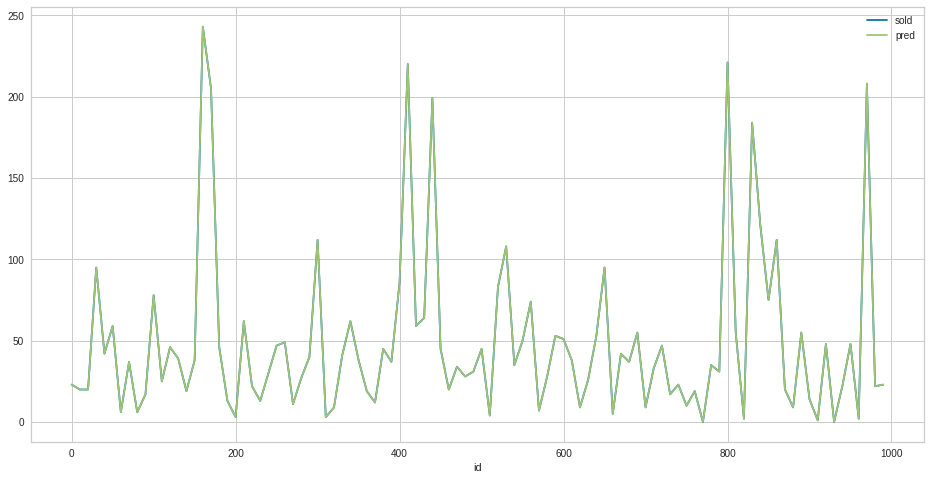

In [45]:
data_plot = predictions[['id','sold','Label']]
groups = data_plot.groupby(['id']).agg('sum').head(100)
groups.rename({'Label':'pred'},axis=1).plot(kind= 'line', figsize=(16,8))

In [39]:
groups

,sold,Label
id,,
0,23,22.998707
10,20,19.996159
20,20,20.003065
30,95,94.998489
40,42,42.001732
...,...,...
30440,15,15.001318
30450,8,7.998084
30460,8,7.998925


In [46]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0020,0.0380,0.1948,0.9981,0.0028,0.0001
1,0.0015,0.0767,0.2770,0.9961,0.0032,0.0001
2,0.0018,0.0204,0.1429,0.9990,0.0040,0.0002
3,0.0015,0.0145,0.1205,0.9992,0.0035,0.0001
4,0.0017,0.0252,0.1588,0.9987,0.0037,0.0002
Mean,0.0017,0.0350,0.1788,0.9982,0.0034,0.0001
SD,0.0002,0.0223,0.0548,0.0011,0.0004,0.0000


In [47]:
tuned_dt = tune_model(dt)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:51:34
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed: 38.2min remaining: 12.0min


KeyboardInterrupt: 

running out of time

In [48]:
predictions = predict_model(dt, data = test_data)
predictions.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend,Label
58327370,14370,1437,3,1,0,0,1914,0,11613,1,...,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,1.000000,0.313477,-0.321533,0.0
58327371,14380,1438,3,1,0,0,1914,0,11613,1,...,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,0.142822,0.257568,-0.253906,0.0
58327372,14390,1439,3,1,0,0,1914,0,11613,1,...,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,0.714355,0.150513,-0.156982,0.0
58327373,14400,1440,3,1,0,0,1914,0,11613,1,...,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,2.000000,1.717773,-1.694336,0.0
58327374,14410,1441,3,1,0,0,1914,1,11613,1,...,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,1.857422,0.966797,0.041016,1.0


<AxesSubplot:xlabel='id'>

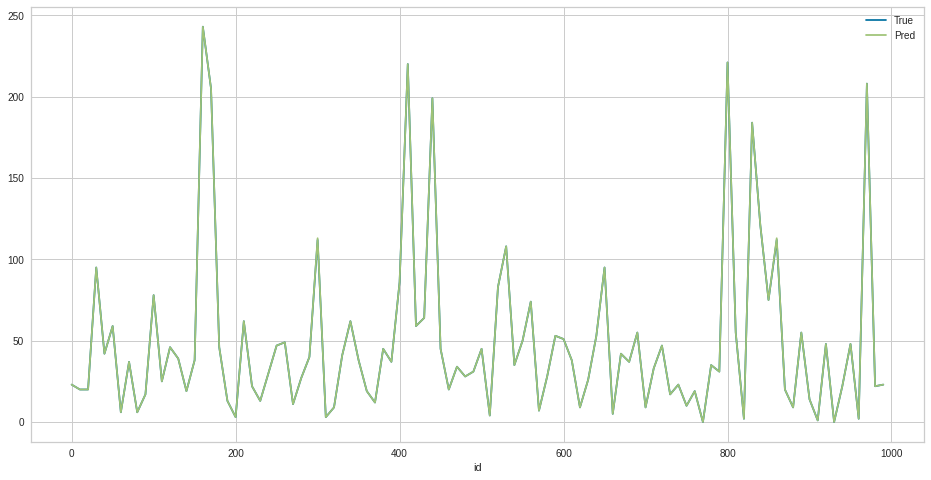

In [50]:
data_plot = predictions[['id','sold','Label']]
groups = data_plot.groupby(['id']).agg('sum').head(100)
groups.rename({'Label':'Pred', 'sold':'True'},axis=1).plot(kind= 'line', figsize=(16,8))